In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
os.chdir("D:\\Data Science\\Machine Leaning\\Assessment\\Logistic Regression using Python")
os.getcwd()

'D:\\Data Science\\Machine Leaning\\Assessment\\Logistic Regression using Python'

In [3]:
#display all columns in dataframe
pd.pandas.set_option('display.max_columns',None)

In [4]:
#read the file
df=pd.read_csv("xAPI-Edu-Data.csv")
df.head(10)

,Gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


#### Getting basic information about the dataset:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [6]:
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])
print("Shape:",df.shape)

Number of rows: 480
Number of columns: 17
Shape: (480, 17)


In [7]:
df.columns

Index(['Gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [8]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


#### Seperating the numerical and categorical variables:

In [9]:
#numerical features in the dataset including both independent and dependent

# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables:', len(numerical_features))

# visualise the numerical variables
print("Numerical features are:")
df[numerical_features].head()

Number of numerical variables: 4
Numerical features are:


,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50


In [10]:
#categorical features in the data set
catergorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']

for feature in catergorical_features:
    print('The Categorical feature is',feature,"and number of categories in each species are:",len(df[feature].unique()))
    print(df[feature].value_counts())

The Categorical feature is Gender and number of categories in each species are: 2
M    305
F    175
Name: Gender, dtype: int64
The Categorical feature is NationalITy and number of categories in each species are: 14
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
Lybia            6
USA              6
Iran             6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64
The Categorical feature is PlaceofBirth and number of categories in each species are: 14
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
USA             16
SaudiArabia     16
Palestine       10
Egypt            9
Tunis            9
Lybia            6
Syria            6
Iran             6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64
The Categorical feature is StageID and number of categories in each species are: 3
MiddleSchool    

#### Finding number and percentage of missing values:

In [11]:
df.isnull().sum()

Gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

There are no missing values.

#### Type casting:

In [12]:
df1=df.copy()
df2=df.copy()

In [13]:
for feature in ['Gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
               'SectionID', 'Topic', 'Semester', 'Relation','ParentAnsweringSurvey', 
                'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']:
    df1[feature]=df1[feature].astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Gender                    480 non-null    category
 1   NationalITy               480 non-null    category
 2   PlaceofBirth              480 non-null    category
 3   StageID                   480 non-null    category
 4   GradeID                   480 non-null    category
 5   SectionID                 480 non-null    category
 6   Topic                     480 non-null    category
 7   Semester                  480 non-null    category
 8   Relation                  480 non-null    category
 9   raisedhands               480 non-null    int64   
 10  VisITedResources          480 non-null    int64   
 11  AnnouncementsView         480 non-null    int64   
 12  Discussion                480 non-null    int64   
 13  ParentAnsweringSurvey     480 non-null    category

### Analysis:

#### Correlation of numerical independent features:

In [14]:
df1[numerical_features].corr()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
raisedhands,1.000000,0.691572,0.643918,0.339386
VisITedResources,0.691572,1.000000,0.594500,0.243292
AnnouncementsView,0.643918,0.594500,1.000000,0.417290
Discussion,0.339386,0.243292,0.417290,1.000000


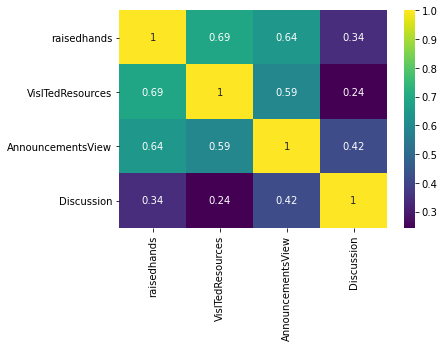

In [15]:
sns.heatmap(data=df1[numerical_features].corr(),annot=True,cmap='viridis')
plt.show()

Raisedhands has most correlation with visitedresources and least with discussion. Discussion has less correlation with other values.

#### Univariate analysis on numerical independent features:

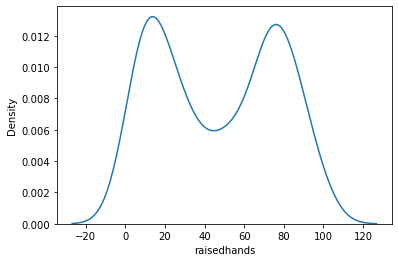

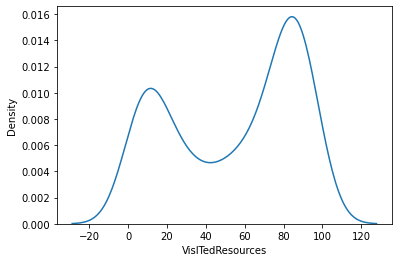

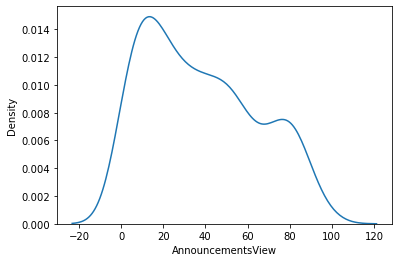

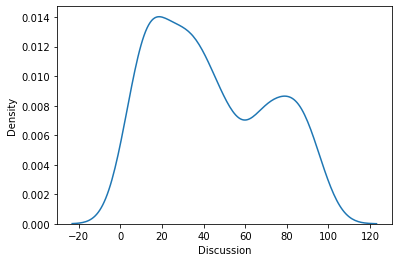

In [16]:
for feature in numerical_features:
    sns.kdeplot(df[feature])
    plt.show()

None of these plots are unimodal and does not follow normal distribution.

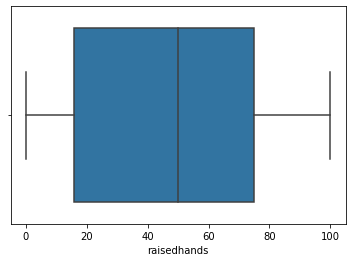

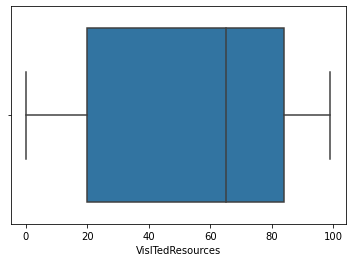

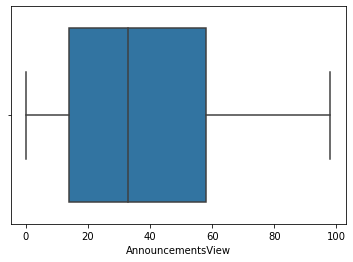

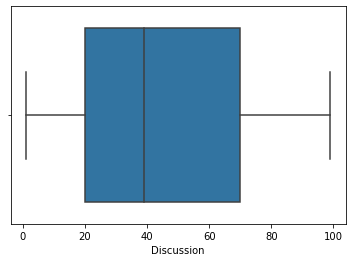

In [17]:
for feature in numerical_features:
    sns.boxplot(data=df,x=df[feature])
    plt.show()

None of the features have any outlier.

### Question 1: Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?

In [18]:
for feature in df1.columns:
    if feature not in ['raisedhands','VisITedResources', 'AnnouncementsView', 'Discussion']:
        print(feature,":\n",df1[feature].value_counts())
        print('_'*110)

Gender :
 M    305
F    175
Name: Gender, dtype: int64
______________________________________________________________________________________________________________
NationalITy :
 KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
Iran             6
Lybia            6
USA              6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64
______________________________________________________________________________________________________________
PlaceofBirth :
 KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Lybia            6
Syria            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64
_______________________________________________________________________________________________

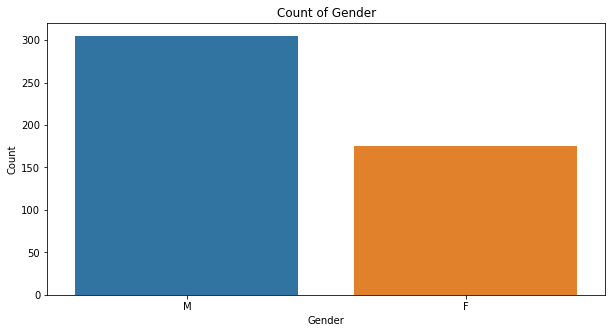

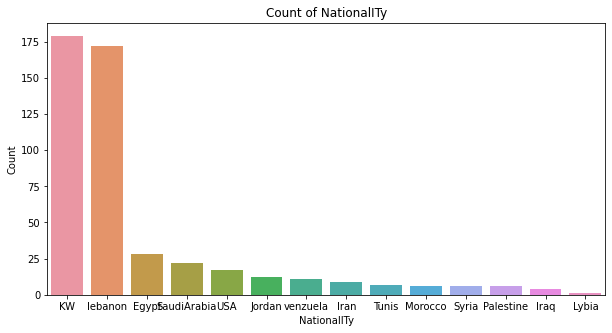

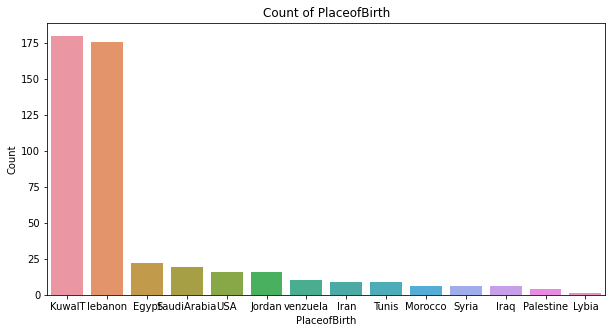

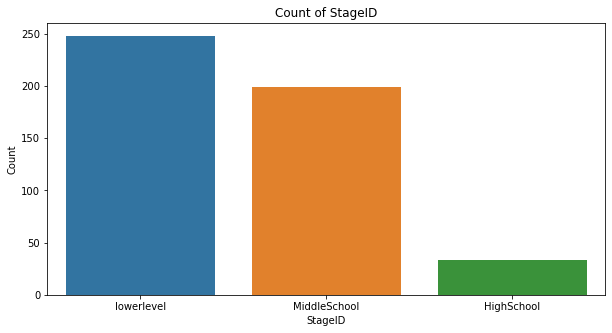

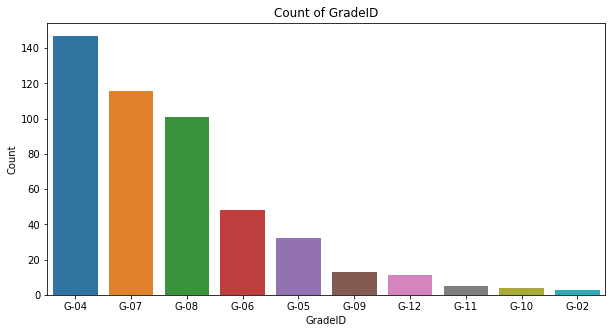

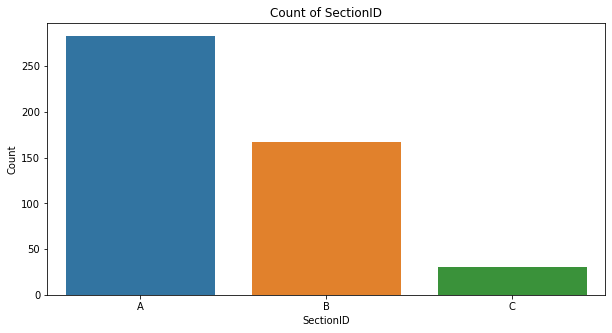

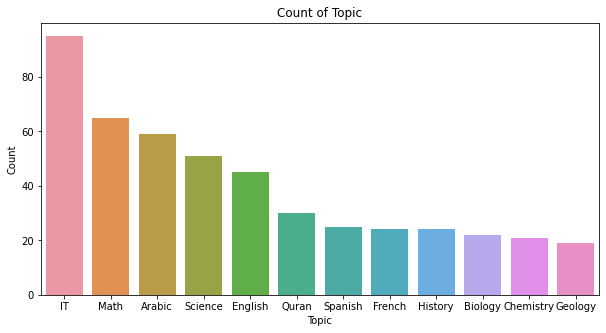

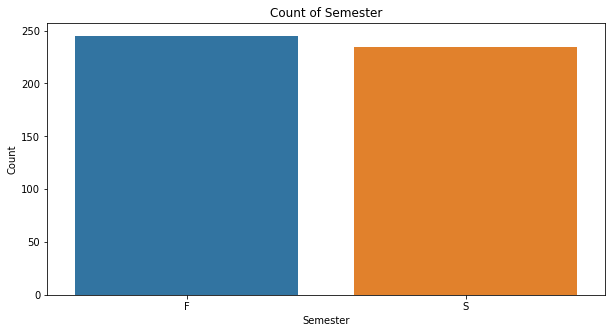

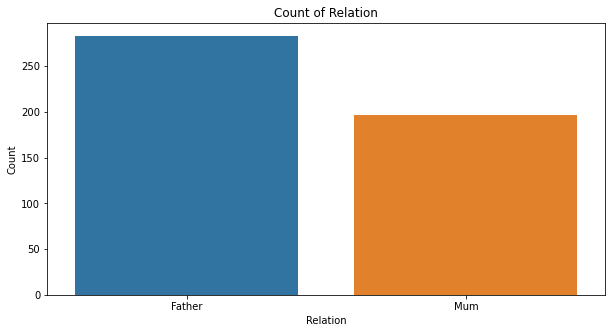

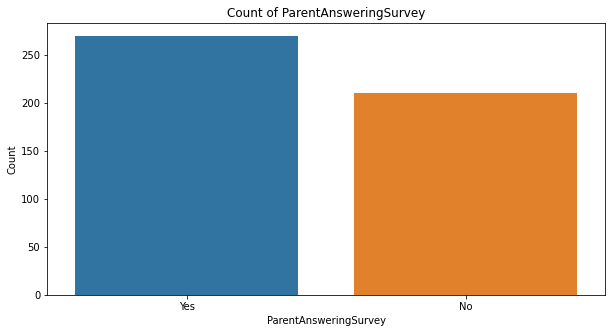

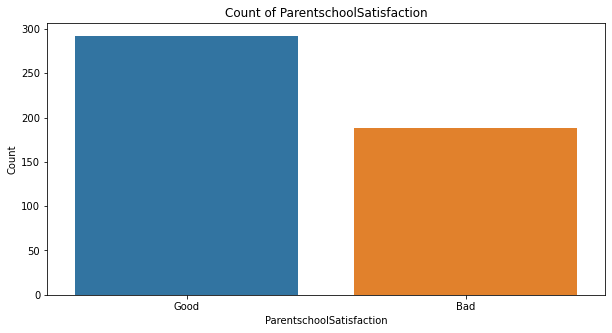

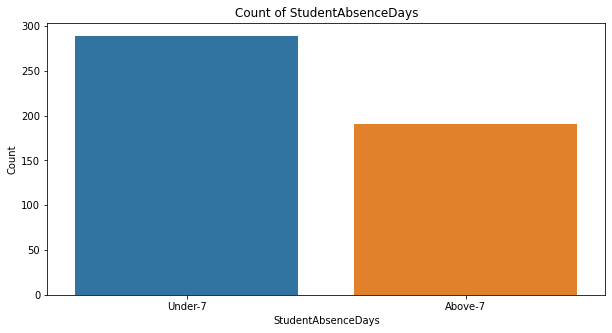

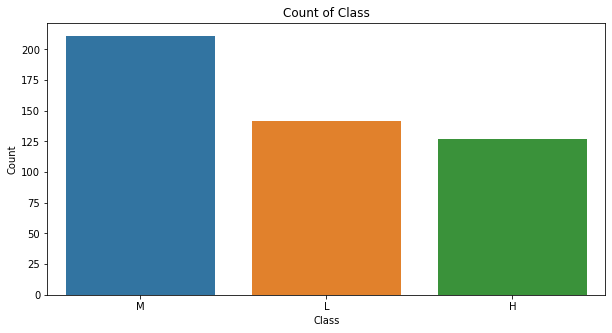

In [19]:
for feature in df1.columns:
    if feature not in ['raisedhands','VisITedResources', 'AnnouncementsView', 'Discussion']:
        fig_dims = (10, 5)
        fig, ax = plt.subplots(figsize=fig_dims)
        sns.barplot(x=df1[feature].unique(),y=df1[feature].value_counts(),data=df1)
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title('Count of {}'.format(feature))
        plt.show()    

From the plots we can see the count of all categorical features. 

1. Count of male is more than female and we can use this to improve the gender ratio in the institution. 

2. Count of nationality and place of birth can be used to improve the inclusivity of all the race and people with origin from different countries. We can ask them about the difficulty they are facing because of their origin and do something to improve their situations. 

3. Count of StageID gives the number of students in lower, medium and higher level. This keeps on decreasing and it could be because students are dropping out more in higher school, the reason for which could be financial or difficulty in completing the school. We can find ways to increase the number of students in highschool.

4. Count of GradeID can be used to know how many students score average, above and beloweaverage. It can be used to know how the school itself is performing. If the school is getting more number of students with higher grades then the teaching strategies are good and the students are performing good.

5. Count of SectionID can be used to know how many students belong in each section.

6. Count of Topic can be used to know what students are preferring to study the most and allocate more funds in that area and if students don't prefer certain subjects we can get feedback and try to improve on those.

7. Count of Student absent days can be used to know if students are taking more or less absence and can find a way to counteract that.

### Question 2: Look at some categorical features in relation to each other, to see what insights could be possibly read?

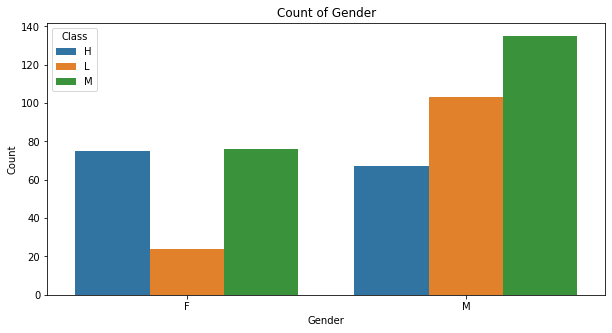

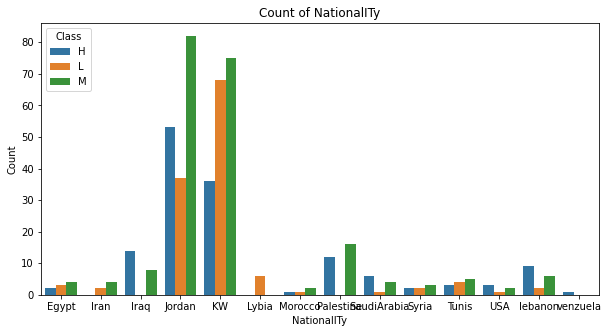

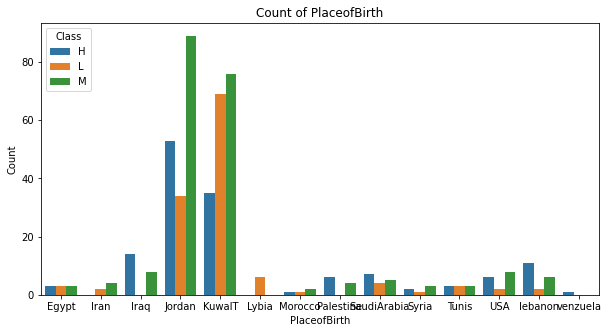

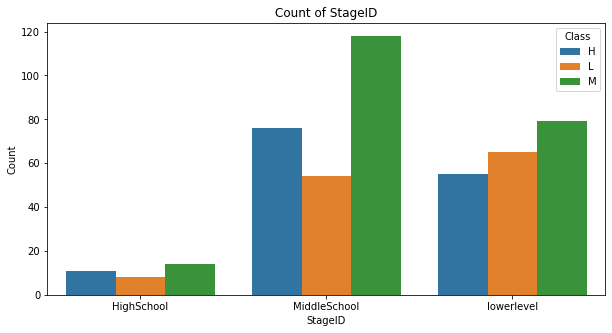

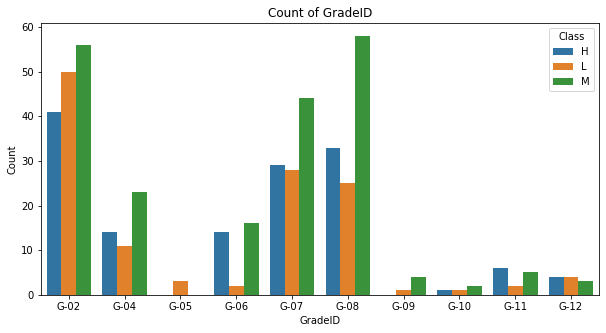

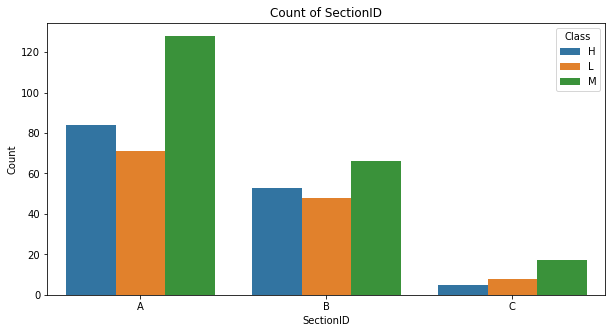

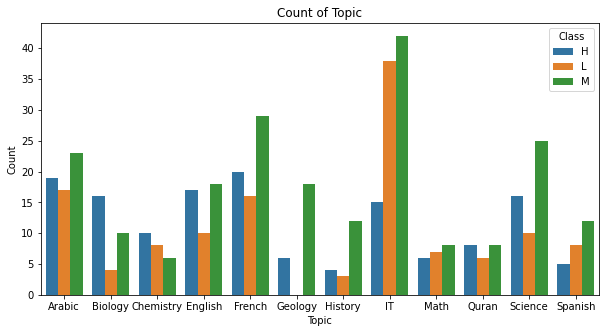

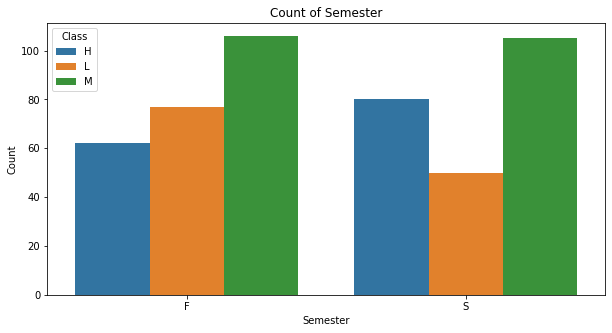

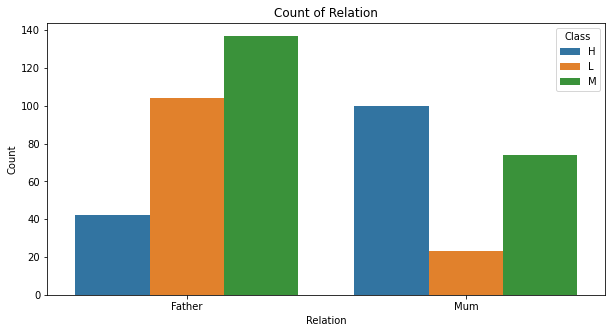

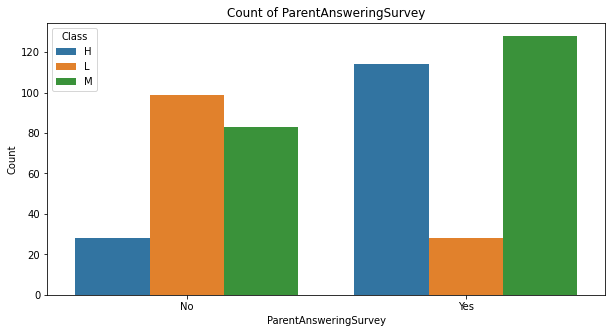

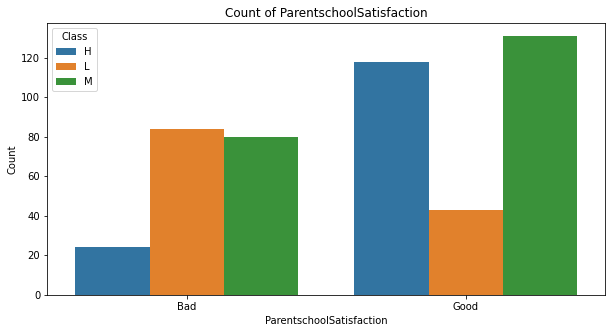

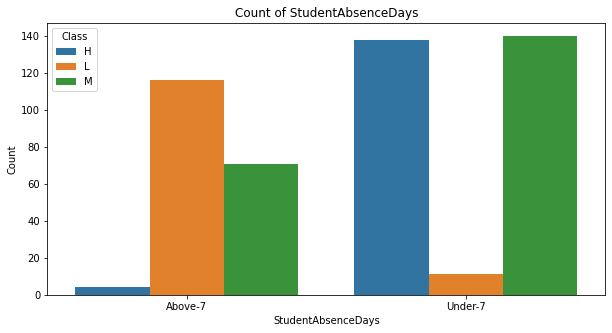

In [20]:
#first comparing all the categorical features with dependent variable Class
for feature in df1.columns:
    if feature not in ['raisedhands','VisITedResources', 'AnnouncementsView', 'Discussion','Class']:
        fig_dims = (10, 5)
        fig, ax = plt.subplots(figsize=fig_dims)
        sns.countplot(x=feature,hue='Class',data=df1)
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title('Count of {}'.format(feature))
        plt.show()

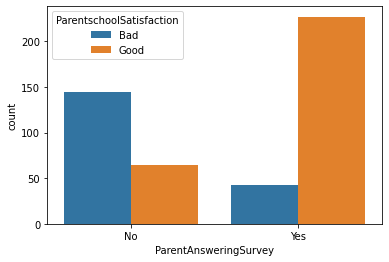

In [21]:
#To find if the parenents who took survey gave good or bad review
sns.countplot(x='ParentAnsweringSurvey',hue='ParentschoolSatisfaction',data=df1)
plt.show()

Those parents who have answered survey have given little Bad reviews compared to the parents who didn't answer survey. We can say like the parents who don't have good reviews are trying not to answer surveys. We can use this to interact with parents on why they are not answering the survey and where the instituion can be improved.

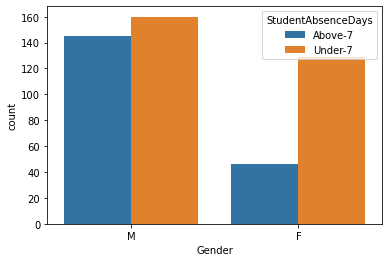

In [22]:
#To find gender wise how many have taken above and below 7 days leave
sns.countplot(x='Gender',hue='StudentAbsenceDays',order=['M','F'],data=df1)
plt.show()

We can see gender wise, female have very few who have taken more than 7 days leave compared to less than 7 days leave. In Male, more people have taken above-7 days leave compared to female. Generally Male students are taking more leave compared to Female students.

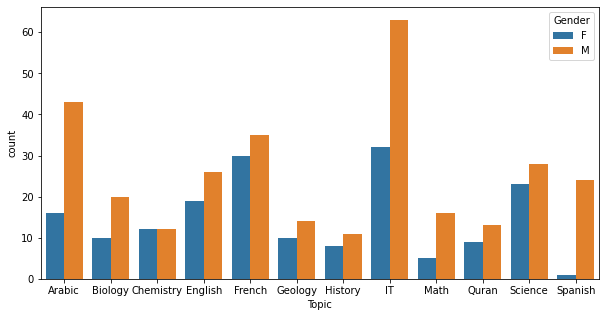

In [23]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Topic',hue='Gender',data=df1);

By looking at the plot we can say there are more number of males in all the Topics, while there is a lot of variation in Spanish between male and female numbers, In chemistry the number of male and female are equal. In none of the Topics number of females is more than male students. We can use this to inspire more female students to pursue the course and improve the gender ratio in the classes.

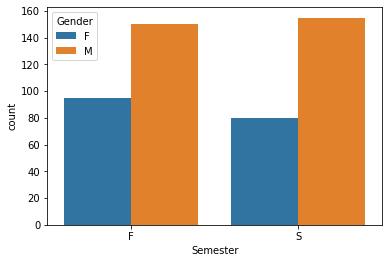

In [24]:
sns.countplot(x='Semester',hue='Gender',data=df1);

In both the semesters the number of male is more than female. The number of male in semester F and S are almost equal, whereas the number of female in semester F is more than S concluding more number of female candidates are enrolling this semester. So whatever strategies we have used this year to get more females to enroll, we can try and use the same the next semester to improve the gender ratio.

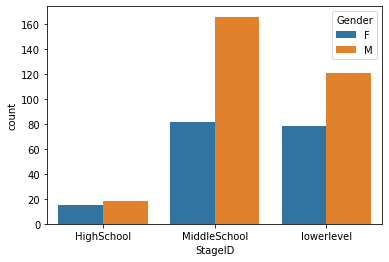

In [25]:
sns.countplot(x='StageID',hue='Gender',data=df1);

There are very few people in high school and a lot in middle school, but again the female count is less compared to male in all three. We can find why there are less number of students in high school to increase the number of admissions  in high school an reduce the drop out.

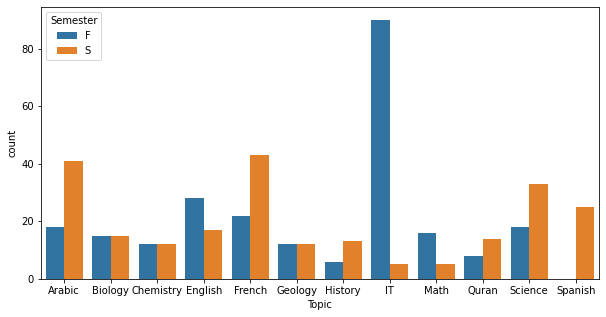

In [26]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Topic',hue='Semester',data=df1);

The enrollment of IT in first semester is a lot more compared to second semester, meaning most of students prefer to take IT as a subject in first semester. None of the students preder to take Spanish as a subject in first semester. 

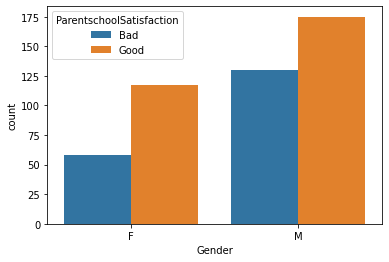

In [27]:
sns.countplot(x='Gender',hue='ParentschoolSatisfaction',data=df1)
plt.show()

The satisfaction of parents of both the gender is leaning towards good more than bad. 

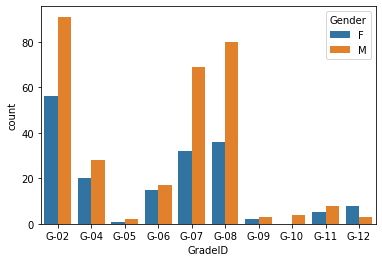

In [28]:
sns.countplot(x='GradeID',hue='Gender',data=df1)
plt.show()

Based on gender we can see the performance of students and their grade. Generally Male students are performing better compared to female.

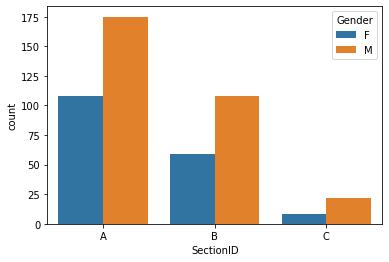

In [29]:
sns.countplot(x='SectionID',hue='Gender',data=df1)
plt.show()

There are very few people in C section and lot of them are in A section. The number of girls is the lowest in C Section and the number of boys is the most in A section.

### Question 3: Visualize categorical variables with numerical variables and give conclusions?

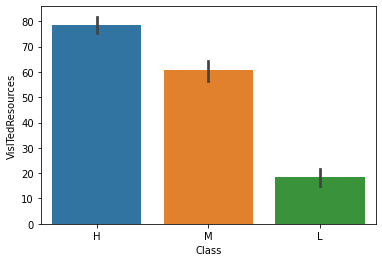

In [30]:
sns.barplot(x="Class",y="VisITedResources",order=['H','M','L'],data=df1);

It shows that the Visited resources increases as we move from lower to higher classes. This shows more number of students from higher classes visit resources. As we move up the Class students visit more resources to get better understanding of the subject.

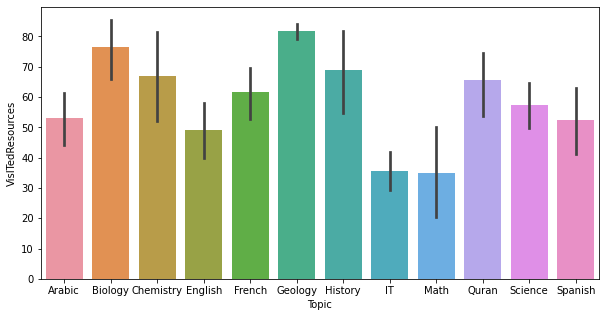

In [31]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="Topic", y="VisITedResources",data=df1);

It shows that the students of Math have Visited resources the least and Geology the most.

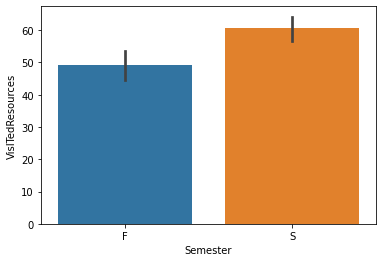

In [32]:
sns.barplot(x="Semester",y="VisITedResources",data=df1);

Students have visited resources more in the second semester compared to the first.

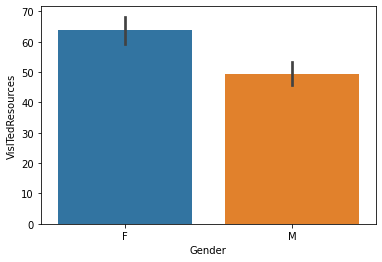

In [33]:
sns.barplot(x="Gender", y="VisITedResources",data=df1);

Female students have visited resources more compared to male students.

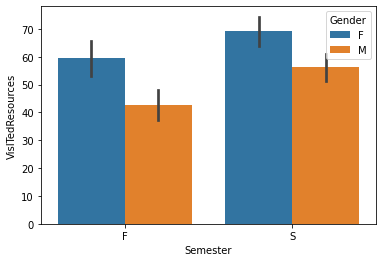

In [34]:
sns.barplot(x="Semester",y="VisITedResources",hue="Gender",data=df1);

In both semesters female students have visited resources more than male. And the number of students who have visited resouces is more during First compared to Second semester.

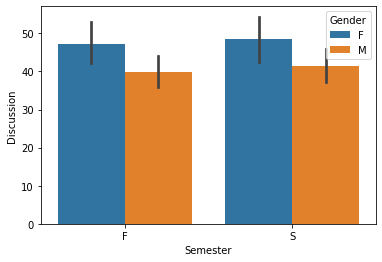

In [35]:
sns.barplot(x="Semester",y="Discussion",hue="Gender",data=df1);

The number of discussions is almost equal in both the semesters and the participation of female students in discussions is more compared to male.

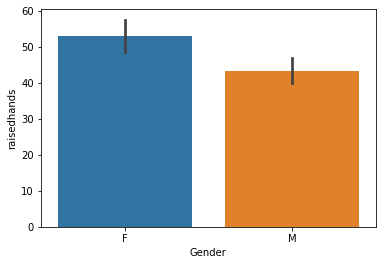

In [36]:
sns.barplot(x="Gender", y="raisedhands",data=df1);

Female students have raised hands more compared to male students indicating they have interacted better in class compared to male.

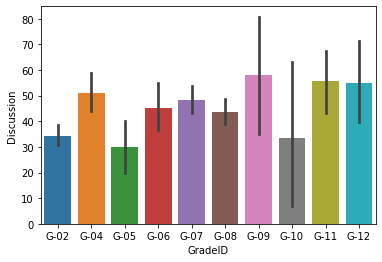

In [37]:
sns.barplot(x="GradeID", y="Discussion",data=df1);

The students with GradeID G=09 have had more discussions and those with GradeID G-05 havehad least discussions.

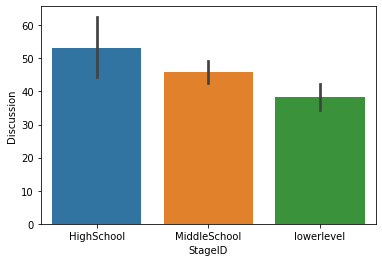

In [38]:
sns.barplot(x="StageID", y="Discussion",data=df1);

The number of discussions are increasing as we move to higher grade meaning better interaction in the class.

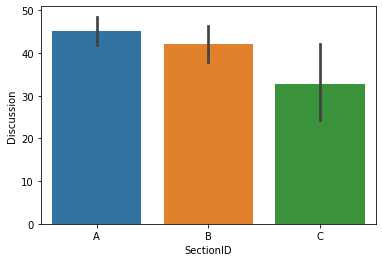

In [39]:
sns.barplot(x="SectionID", y="Discussion",data=df1);

The number of discussions had by A section is more than B, and B is more than C, we can A is more interactive of them all.

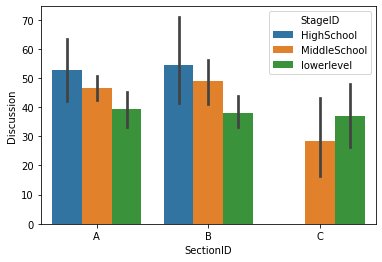

In [40]:
sns.barplot(x="SectionID", y="Discussion",hue='StageID',data=df1);

There is no C section in Highschool, and we can see a pattern here that as we move to higher classes discussions are more. The middle school C section has least number of discussions, whereas HighSchool B section has most number of discussions.

### Question 4: From the above result, what are the factors that leads to get low grades of the students?

In [41]:
table = pd.pivot_table(data=df,index=['GradeID'])
table1 = pd.DataFrame(table)
table1

,AnnouncementsView,Discussion,VisITedResources,raisedhands
GradeID,,,,
G-02,28.122449,34.374150,51.476190,36.530612
G-04,43.125000,51.125000,51.687500,46.729167
G-05,12.666667,30.000000,14.000000,12.000000
G-06,47.000000,45.343750,54.937500,61.625000
G-07,37.811881,48.485149,53.811881,47.722772
G-08,46.715517,43.784483,63.370690,56.784483
G-09,27.000000,58.000000,46.000000,21.600000
G-10,31.250000,33.500000,44.500000,36.750000
G-11,52.384615,55.692308,62.307692,58.307692


We are finding the mean value of all numerical columns based on gradeId. 

In reality GradeID is most influenced by number of discussions, raisedhands which imply students are interactive and absentdays which affects students' performance.

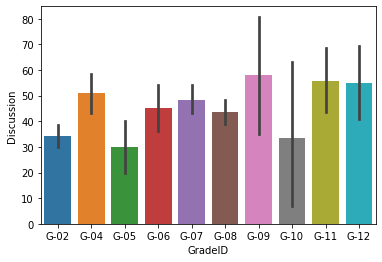

In [42]:
sns.barplot(x="GradeID", y="Discussion",data=df1);

The students of average grade G-09 have had most  discussions and then the students of higher grade have had 2nd highest discussion. We need to find why even though students of grade G-06 and G-04 after having many discussions haven't scored higher grades. 

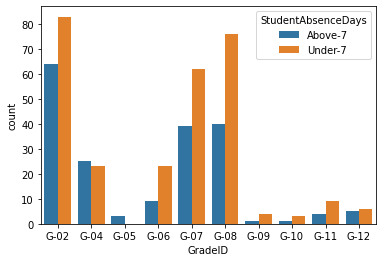

In [43]:
#sns.countplot(x=df1['GradeID'].unique(), y=df1['StudentAbsenceDays'].values_count(),data=df1);
sns.countplot(x='GradeID',hue='StudentAbsenceDays',data=df1)
plt.show()

It is evident from the plot that students who have taken a lot of leaves have scored lower grade signifying their performance is affected by being absent.

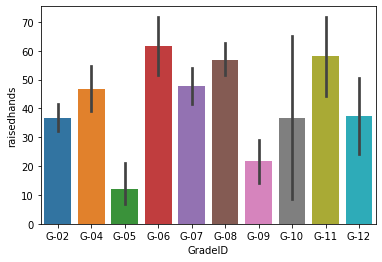

In [44]:
sns.barplot(x="GradeID", y="raisedhands",data=df1);

Raisedhands doesn't exactly pin point if the students will score higher grade. There is no definitive pattern we can detect between raising hands and their grades.

### Question 5: Build classification model and present it's classification report?

In [45]:
df1.head()

,Gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [46]:
df3=df1.copy()
df3.head()

,Gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [47]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Gender                    480 non-null    category
 1   NationalITy               480 non-null    category
 2   PlaceofBirth              480 non-null    category
 3   StageID                   480 non-null    category
 4   GradeID                   480 non-null    category
 5   SectionID                 480 non-null    category
 6   Topic                     480 non-null    category
 7   Semester                  480 non-null    category
 8   Relation                  480 non-null    category
 9   raisedhands               480 non-null    int64   
 10  VisITedResources          480 non-null    int64   
 11  AnnouncementsView         480 non-null    int64   
 12  Discussion                480 non-null    int64   
 13  ParentAnsweringSurvey     480 non-null    category

#### Multi-collinearity Check:

In [48]:
vif = pd.DataFrame()
vif['feature'] = numerical_features
vif['VIF'] = [variance_inflation_factor(df1.iloc[:,9:13].values,i) for i in range(len(df1.iloc[:,9:13].columns))]

In [49]:
vif

,feature,VIF
0,raisedhands,7.624493
1,VisITedResources,6.893179
2,AnnouncementsView,6.075343
3,Discussion,3.365527


There is a problem of multi-collinearity between the numerical featues.The feature raisedhands is most affected by other numerical features, whereas Discussion is least affected by other features.

#### Prevalence Rate:
It is used to find if the data set is balanced or not. The condition for balanced data is the minority class of the dataset should have more than 25% of data. Example: 60-40,70-30. In this the minority class is having 40 and 30 percent of data respectively. So such dataset are balanced.

We can use this to find the metrics that we will adopt for the model.

1. If the actual value is 0 and model is predicting 1, it is called 'False-Positive(FP)'.
2. If the actual value is 1 and model is predicting 0, it is called 'False-Negative(FN)'.
3. If the actual value is 0 and model is predicting 0, it is called 'True-Negative(TN)'.
4. If the actual value is 1 and model is predicting 1, it is called 'True-Positive(TP)'.

If the dataset is balanced the metrics we use is Accuracy. Else depending on 'False-Positive(FP)' and 'False-Negative(FN)' and their misclassification we can go for Precision, Recall or F1-Score.

1. If concentration is more on FP -> Metrics = Precision.

2. If concentration is more on FN -> Metrics = Recall.

3. If concentration is more on both FN and FP -> Metrics = F1-Score. [Misclassification]

4. If concentration is more on both TN and TP -> Metrics = Accuracy. [Correct Classification]


In [50]:
#Prevalence rate of the dataset
df3['Class'].value_counts(normalize=True)

M    0.439583
H    0.295833
L    0.264583
Name: Class, dtype: float64

df4=df3.copy()

df5=df3.copy()

#### Encoding the data:

In [51]:
encode=LabelEncoder()
for feature in ['StageID','GradeID','SectionID']:
    df3[feature]=encode.fit_transform(df3[feature])
df3

,Gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,2,1,0,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,2,1,0,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,2,1,0,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,2,1,0,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,2,1,0,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,1,5,0,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,1,5,0,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,1,5,0,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,1,5,0,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [52]:
df3['Class'].value_counts(normalize=True)

M    0.439583
H    0.295833
L    0.264583
Name: Class, dtype: float64

In [53]:
df3['Class'].replace({'M':0},inplace=True)
df3['Class'].replace({'L':2},inplace=True)
df3['Class'].replace({'H':1},inplace=True)
df3

,Gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,2,1,0,IT,F,Father,15,16,2,20,Yes,Good,Under-7,0
1,M,KW,KuwaIT,2,1,0,IT,F,Father,20,20,3,25,Yes,Good,Under-7,0
2,M,KW,KuwaIT,2,1,0,IT,F,Father,10,7,0,30,No,Bad,Above-7,2
3,M,KW,KuwaIT,2,1,0,IT,F,Father,30,25,5,35,No,Bad,Above-7,2
4,M,KW,KuwaIT,2,1,0,IT,F,Father,40,50,12,50,No,Bad,Above-7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,1,5,0,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,2
476,F,Jordan,Jordan,1,5,0,Geology,F,Father,50,77,14,28,No,Bad,Under-7,0
477,F,Jordan,Jordan,1,5,0,Geology,S,Father,55,74,25,29,No,Bad,Under-7,0
478,F,Jordan,Jordan,1,5,0,History,F,Father,30,17,14,57,No,Bad,Above-7,2


In [54]:
df3 = pd.get_dummies(df3, columns = ['Gender', 'NationalITy','PlaceofBirth','Topic','Semester','Relation','ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays'])
df3

,StageID,GradeID,SectionID,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,Gender_F,Gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,NationalITy_Morocco,NationalITy_Palestine,NationalITy_SaudiArabia,NationalITy_Syria,NationalITy_Tunis,NationalITy_USA,NationalITy_lebanon,NationalITy_venzuela,PlaceofBirth_Egypt,PlaceofBirth_Iran,PlaceofBirth_Iraq,PlaceofBirth_Jordan,PlaceofBirth_KuwaIT,PlaceofBirth_Lybia,PlaceofBirth_Morocco,PlaceofBirth_Palestine,PlaceofBirth_SaudiArabia,PlaceofBirth_Syria,PlaceofBirth_Tunis,PlaceofBirth_USA,PlaceofBirth_lebanon,PlaceofBirth_venzuela,Topic_Arabic,Topic_Biology,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,2,1,0,15,16,2,20,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1
1,2,1,0,20,20,3,25,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1
2,2,1,0,10,7,0,30,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0
3,2,1,0,30,25,5,35,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0
4,2,1,0,40,50,12,50,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,5,0,5,4,5,8,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0
476,1,5,0,50,77,14,28,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1
477,1,5,0,55,74,25,29,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1
478,1,5,0,30,17,14,57,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0


#### Splitting data to dependent(y) and independent(x) and feeding it to train_test_split:

In [55]:
x=df3.drop('Class',axis=1)
y=df3.iloc[:,7]

In [56]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=42)

#### NOTEEEEEEE:
I'm giving random state here as everytime we run, we get different accuracy score without random state and I'm not able to properly write conclusions or insights without it.

We can give stratify=y in the train_test_split if we know the dataset is imbalanced, this will make the prevalence rate of test and train to be almost same.

In [57]:
print("Shape of X train:",X_train.shape)
print("Shape of Y train:",Y_train.shape)
print("\nShape of X test:",X_test.shape)
print("Shape of Y test:",Y_test.shape)

Shape of X train: (336, 59)
Shape of Y train: (336,)

Shape of X test: (144, 59)
Shape of Y test: (144,)


In [58]:
#prevalence rate for test and train data
print("For train data:")
print(Y_train.value_counts(normalize=True))
print("\nFor test data:")
print(Y_test.value_counts(normalize=True))

For train data:
0    0.425595
1    0.330357
2    0.244048
Name: Class, dtype: float64

For test data:
0    0.472222
2    0.312500
1    0.215278
Name: Class, dtype: float64


The prevalence rate of test and train are varying by almost + or - 5%.

#### Fitting the model and predicting train and test values, and probability of train and test values:

In [59]:
lom=linear_model.LogisticRegression(max_iter=5000)
lom.fit(X_train,Y_train)

LogisticRegression(max_iter=5000)

In [60]:
train_pred=lom.predict(X_train)
test_pred=lom.predict(X_test)

In [61]:
lom.predict_proba(X_train)

array([[6.94459735e-01, 3.04928968e-01, 6.11296164e-04],
       [2.08084067e-01, 4.94498859e-03, 7.86970944e-01],
       [1.43052260e-01, 8.56910692e-01, 3.70479886e-05],
       ...,
       [9.19305113e-02, 3.66354499e-04, 9.07703134e-01],
       [8.13937212e-01, 1.12721200e-01, 7.33415878e-02],
       [5.76185411e-02, 7.57447550e-05, 9.42305714e-01]])

In [62]:
lom.predict_proba(X_test)

array([[4.17428766e-01, 6.88319367e-03, 5.75688041e-01],
       [4.57178163e-02, 1.60010260e-03, 9.52682081e-01],
       [1.60661349e-01, 8.39153981e-01, 1.84669967e-04],
       [5.86898266e-01, 4.12665453e-01, 4.36280550e-04],
       [5.54658424e-01, 4.45318004e-01, 2.35717562e-05],
       [9.08635953e-01, 1.51463435e-03, 8.98494124e-02],
       [1.58950131e-01, 2.07883241e-04, 8.40841986e-01],
       [1.37075536e-01, 1.05687512e-04, 8.62818776e-01],
       [9.32409161e-01, 5.68969758e-02, 1.06938631e-02],
       [9.29226548e-01, 5.50779564e-02, 1.56954952e-02],
       [4.36612865e-01, 5.62717886e-01, 6.69248755e-04],
       [2.78293574e-01, 7.21221265e-01, 4.85160894e-04],
       [7.91005723e-01, 2.08486048e-01, 5.08229457e-04],
       [1.94229108e-01, 1.80877918e-04, 8.05590014e-01],
       [4.10971379e-01, 5.84878160e-01, 4.15046138e-03],
       [7.93023353e-01, 2.06675066e-01, 3.01580828e-04],
       [8.91140373e-02, 8.84692808e-04, 9.10001270e-01],
       [9.21669634e-01, 6.22496

In [63]:
pred_proba_train=np.argmax(lom.predict_proba(X_train),axis=1)
pred_proba_train

array([0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1,
       0, 0, 0, 2, 2, 1, 1, 0, 1, 0, 0, 2, 0, 2, 1, 1, 0, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 1,
       1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 1, 0, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 2,
       0, 1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 2, 1, 0, 0, 2, 1, 2, 2, 1, 1, 2,
       2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 0,
       0, 2, 1, 2, 0, 0, 1, 2, 0, 1, 2, 0, 2, 1, 2, 2, 0, 0, 2, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 2, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 0,
       1, 0, 1, 0, 2, 1, 0, 2, 0, 1, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 1, 0,
       0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0,

In [64]:
train_pred

array([0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1,
       0, 0, 0, 2, 2, 1, 1, 0, 1, 0, 0, 2, 0, 2, 1, 1, 0, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 1,
       1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 1, 0, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 2,
       0, 1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 2, 1, 0, 0, 2, 1, 2, 2, 1, 1, 2,
       2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 0,
       0, 2, 1, 2, 0, 0, 1, 2, 0, 1, 2, 0, 2, 1, 2, 2, 0, 0, 2, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 2, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 0,
       1, 0, 1, 0, 2, 1, 0, 2, 0, 1, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 1, 0,
       0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0,

In [65]:
pred_proba_test=np.argmax(lom.predict_proba(X_test),axis=1)
pred_proba_test

array([2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 0, 1, 1,
       2, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0,
       1, 2, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 2, 2, 1, 0, 0,
       2, 0, 2, 1, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 1, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 2, 2, 1, 0, 1, 1, 2, 0, 2,
       0, 0, 0, 1, 0, 2, 1, 0, 0, 2, 2, 2, 1, 1, 2, 0, 0, 2, 0, 0, 0, 2,
       2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2], dtype=int64)

In [66]:
test_pred

array([2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 0, 1, 1,
       2, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0,
       1, 2, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 2, 2, 1, 0, 0,
       2, 0, 2, 1, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 1, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 2, 2, 1, 0, 1, 1, 2, 0, 2,
       0, 0, 0, 1, 0, 2, 1, 0, 0, 2, 2, 2, 1, 1, 2, 0, 0, 2, 0, 0, 0, 2,
       2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2], dtype=int64)

#### Accuracy Score of test and train data:

In [67]:
print("Training accuracy:",accuracy_score(Y_train,train_pred))
print("Testing accuracy:",accuracy_score(Y_test,test_pred))

Training accuracy: 0.8303571428571429
Testing accuracy: 0.7638888888888888


Difference between the above 2 should not cross + or - 5%, hence we can conclude model is overfitted if training accuracy is more than testing accuracy and underfitted if training accuracy is less than testing accuracy.

The training accuracy of 83% is more than testing accuracy of 76%, which implies model is overfitting.

#### Confusion matrix of test and train data:

In [68]:
print("Confustion matrix of train data:\n",confusion_matrix(Y_train,train_pred))
print("\nConfustion matrix of test data:\n",confusion_matrix(Y_test,test_pred))

Confustion matrix of train data:
 [[115  22   6]
 [ 20  91   0]
 [  9   0  73]]

Confustion matrix of test data:
 [[50  9  9]
 [11 20  0]
 [ 5  0 40]]


In the confusion matrix we will get TP,TN,FP and FN. we can tune the training data to lessen the FP and FN. Nothing should be done test data. 

#### Classification Report of test and train data:

In [69]:
print("Classification Report of train data:\n\n",classification_report(Y_train,train_pred))
print('-'*75)
print("Classification Report of test data:\n\n",classification_report(Y_test,test_pred))

Classification Report of train data:

               precision    recall  f1-score   support

           0       0.80      0.80      0.80       143
           1       0.81      0.82      0.81       111
           2       0.92      0.89      0.91        82

    accuracy                           0.83       336
   macro avg       0.84      0.84      0.84       336
weighted avg       0.83      0.83      0.83       336

---------------------------------------------------------------------------
Classification Report of test data:

               precision    recall  f1-score   support

           0       0.76      0.74      0.75        68
           1       0.69      0.65      0.67        31
           2       0.82      0.89      0.85        45

    accuracy                           0.76       144
   macro avg       0.75      0.76      0.75       144
weighted avg       0.76      0.76      0.76       144



We will all the metrics as summary in the report. 
The training accuracy of 83% is more than testing accuracy of 76%, which implies model is overfitting.

#### Cross-Validation Score:

In [70]:
crossval=cross_val_score(lom,X_train,Y_train,cv=5)
print("Cross validation score:",crossval)

Cross validation score: [0.75       0.79104478 0.76119403 0.73134328 0.74626866]


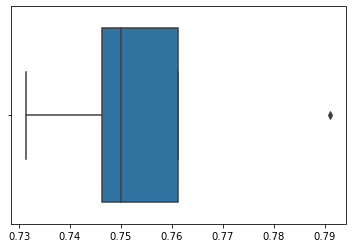

In [71]:
sns.boxplot(x=crossval,data=df1)
plt.show()

There is an outlier in the cross validation with 79%. 